In [1]:
%pylab inline
from lib import matools
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


We begin by simply loading the data in. The positions are estimated from guessing component positions in photoshop from a photo of the circuitboard. The order was established manually - pretty sure this is right.

In [2]:
positions = 1e-3*np.array([
    [0, 0],
    [42.6, -0.5],
    [21.5, -37.7],
    [-21.2, -37.7],
    [-42.3, -0.8],
    [-21.2, 35.8],
    [21.4, 36.2]])
ma = matools.MicrophoneArray(positions)
ma.load_data('datasets/uma8 calibration data/UMA8_Track ')
t = ma.get_time()

In the experiment, I whistled a tone at the array from each of the microphone directions, i.e. for values of 
\begin{equation*}
    \theta \in \{0, \pi/3, 2\pi/3, \pi, -2\pi/3, -\pi/3\}
\end{equation*}
probably around 1.5-2m away. The directions are obviously just a guess, so this will need to be corrected.

The first step is to figure out the time values where the tones are located. So, we'll plot one channel so that we can estimate this.

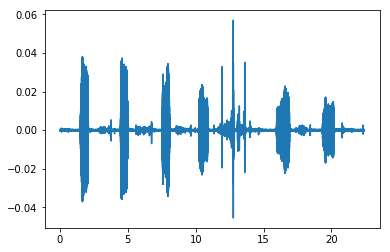

In [3]:
plot(t, ma.data[0])

In [4]:
#t_mark = np.array([6.1, 14.3, 22.8, 31.4, 38.64, 45.74])
t_mark = np.array([1.7, 4.6, 7.9, 10.5, 16.6, 19.7])
theta_mark = np.array([0, pi/3, 2*pi/3, pi, -2*pi/3, -pi/3])

Plot each window, to check it all looks vaguely OK

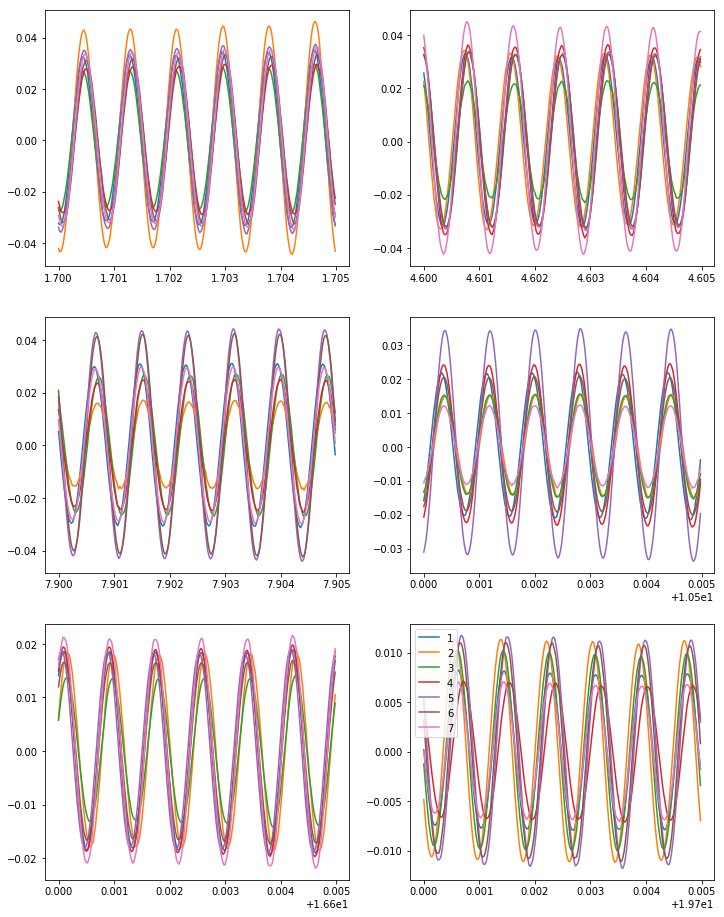

In [8]:
#t_mark = np.array([6.1, 14.3, 22.8, 31.4, 38.64, 45.74])
theta_mark = np.array([0, pi/3, 2*pi/3, pi, -2*pi/3, -pi/3])
fig, ax = plt.subplots(3, 2, figsize=(12, 16))

for k in range(len(t_mark)):
    a = ax.flatten()[k]
    y, t = ma.get_window(t_mark[k], 0.005, theta_mark[k])
    for w in y:
        a.plot(t, w)

    #y, t = ma.get_window(2, 0.005, 350*pi/180)
legend([1, 2, 3, 4, 5, 6, 7])

In [159]:
theta = -30*pi/180
y, t = ma.get_window(t_mark[5], 0.005, theta)
clf()
for w in y:
    plot(t, w)
legend([1, 2, 3, 4, 5, 6, 7])

Now we need to define an objective function - we're going to optimise the starting positions of the microphones. We'll stack the coordinates in the natural way

In [47]:
def objective(x):
    y = []
    for k in range(6:
        w, t = ma.get_window(t_mark[k], 0.005, theta[k])
        y.append(norm(sum(w, 0)))
    return -norm(array(y))

In [59]:
from scipy.optimize import minimize
minimize(objective, np.concatenate((positions.flatten(), theta_mark)), method='nelder-mead')

 final_simplex: (array([[ 3.58382818e-02, -7.31082342e-03,  6.22418231e-02,
         4.46719353e-04,  3.96981886e-02, -3.54789075e-02,
         2.16445803e-02, -3.48167986e-02,  1.77093365e-02,
        -5.14833365e-03,  2.25196647e-02,  3.03695116e-02,
         4.98174007e-02,  4.45903610e-02,  5.53552618e-03,
         5.11285307e+00, -1.51860842e+01,  9.99474394e+00,
         1.48929984e-01,  8.43092951e+00],
       [ 3.58676698e-02, -7.15827237e-03,  6.23455345e-02,
         4.32603677e-04,  3.97378455e-02, -3.51937096e-02,
         2.17270084e-02, -3.48819549e-02,  1.79176687e-02,
        -5.10871347e-03,  2.25102288e-02,  3.02361768e-02,
         4.98171091e-02,  4.50112756e-02,  5.63484004e-03,
         5.12716010e+00, -1.52379608e+01,  1.00065518e+01,
         1.14452293e-01,  8.45350243e+00],
       [ 3.59246360e-02, -6.91215977e-03,  6.24764432e-02,
         3.98837612e-04,  3.97369030e-02, -3.53622922e-02,
         2.15419996e-02, -3.47766030e-02,  1.76632257e-02,
        -4.9

array([0, 1, 2, 0, 1, 2, 3, 4])